In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_hdf('SPY.h5')

In [3]:
stock.head()

,reqID,Open,High,Low,Close,Volume,Count,WAP
Date,,,,,,,,
2018-04-16 15:30:00,5001,267.00,267.08,266.46,266.61,14411,5469,266.843
2018-04-16 15:35:00,5001,266.62,266.66,266.24,266.43,11193,4497,266.410
2018-04-16 15:40:00,5001,266.42,266.53,266.07,266.47,9078,4058,266.282
2018-04-16 15:45:00,5001,266.46,266.75,266.45,266.55,9429,4347,266.558
2018-04-16 15:50:00,5001,266.55,266.59,266.16,266.35,7948,3338,266.329


In [4]:
stock.dtypes

reqID      object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
Count      object
WAP       float64
dtype: object

In [5]:
stock.reqID = stock.reqID.astype('int32')
stock.Volume = stock.Volume.astype('int64')
stock.Count = stock.Count.astype('int64')

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
xlabels = stock['2004-02'].index[::200]

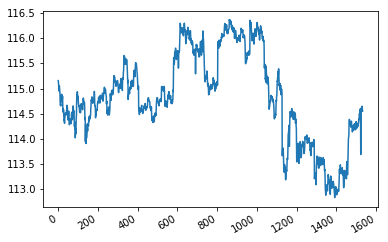

In [8]:
stock['2004-02'].WAP.plot(use_index=False)

In [9]:
stock["DiffHL"] = (stock.High-stock.Low)/stock.WAP
stock["DiffOC"] = abs(stock.Open-stock.Close)
stock["VolumeOverCount"] =stock.Volume/stock.Count
stock.head()

,reqID,Open,High,Low,Close,Volume,Count,WAP,DiffHL,DiffOC,VolumeOverCount
Date,,,,,,,,,,,
2018-04-16 15:30:00,5001,267.00,267.08,266.46,266.61,14411,5469,266.843,0.002323,0.39,2.635034
2018-04-16 15:35:00,5001,266.62,266.66,266.24,266.43,11193,4497,266.410,0.001577,0.19,2.488993
2018-04-16 15:40:00,5001,266.42,266.53,266.07,266.47,9078,4058,266.282,0.001727,0.05,2.237063
2018-04-16 15:45:00,5001,266.46,266.75,266.45,266.55,9429,4347,266.558,0.001125,0.09,2.169082
2018-04-16 15:50:00,5001,266.55,266.59,266.16,266.35,7948,3338,266.329,0.001615,0.20,2.381067


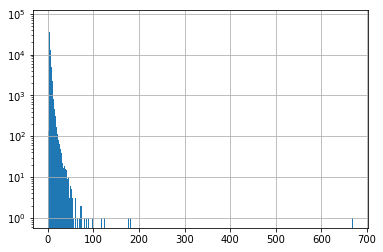

In [10]:
stock['VolumeOverCount'].hist(log=True, bins=1000)

In [12]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates